<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Assignment_6_LAB10_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline
data1 = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/HW11_poly_regression.csv')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
data1 = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/HW11_poly_regression.csv')

# Split the dataset
train_data = data1.iloc[:64]  # First 64 observations for training
validation_data = data1.iloc[64:72]  # Next 8 observations for validation
test_data = data1.iloc[72:]  # Last 8 observations for testing

# Check the sizes of each set
print("Training set size:", train_data.shape)
print("Validation set size:", validation_data.shape)
print("Test set size:", test_data.shape)

# Display the first few rows of each set
print("\nTraining Set:")
print(train_data.head())

print("\nValidation Set:")
print(validation_data.head())

print("\nTest Set:")
print(test_data.head())


Training set size: (64, 3)
Validation set size: (8, 3)
Test set size: (8, 3)

Training Set:
   Unnamed: 0     x            y
0           0 -15.0 -2156.994097
1           1 -14.5 -1956.523904
2           2 -14.0 -1778.151738
3           3 -13.5 -1610.924846
4           4 -13.0 -1456.176307

Validation Set:
    Unnamed: 0     x            y
64          64  17.0  1887.877609
65          65  17.5  2081.877286
66          66  18.0  2283.469520
67          67  18.5  2497.509043
68          68  19.0  2721.708052

Test Set:
    Unnamed: 0     x            y
72          72  21.0  3764.871416
73          73  21.5  4064.435650
74          74  22.0  4371.531453
75          75  22.5  4704.656094
76          76  23.0  5049.983454


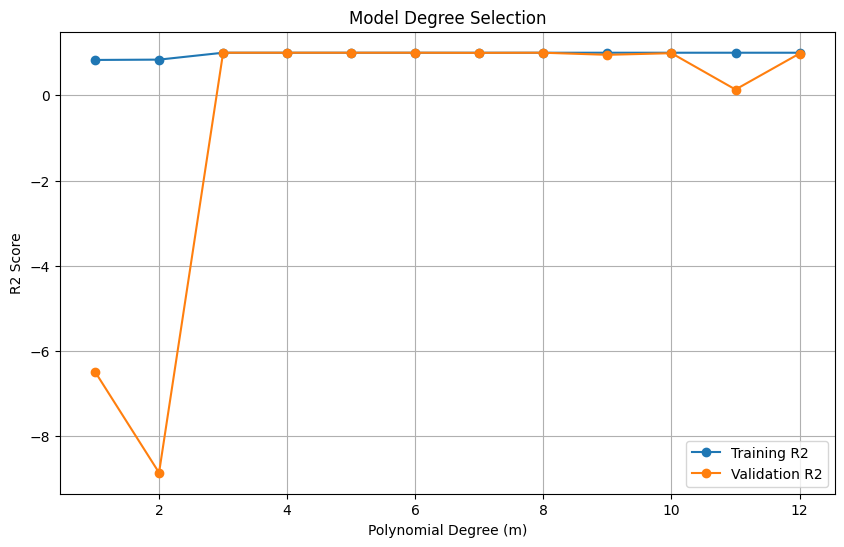

The optimal degree of the polynomial is: 4


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset directly from the URL
data1 = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/HW11_poly_regression.csv')

# Split the dataset
train_data = data1.iloc[:64]  # First 64 observations for training
validation_data = data1.iloc[64:72]  # Next 8 observations for validation

# Separate features and target variable for train and validation sets
X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y'].values
X_validation = validation_data['x'].values.reshape(-1, 1)
y_validation = validation_data['y'].values

# Variables to store R2 scores
train_r2_scores = []
validation_r2_scores = []

# Loop through polynomial degrees from 1 to 12
degrees = range(1, 13)
for m in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.transform(X_validation)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Compute R2 scores
    y_train_pred = model.predict(X_train_poly)
    y_validation_pred = model.predict(X_validation_poly)

    train_r2 = r2_score(y_train, y_train_pred)
    validation_r2 = r2_score(y_validation, y_validation_pred)

    train_r2_scores.append(train_r2)
    validation_r2_scores.append(validation_r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label="Training R2", marker='o')
plt.plot(degrees, validation_r2_scores, label="Validation R2", marker='o')
plt.xlabel("Polynomial Degree (m)")
plt.ylabel("R2 Score")
plt.title("Model Degree Selection")
plt.legend()
plt.grid(True)
plt.show()

# Determine the optimal degree based on validation R2
optimal_degree = degrees[np.argmax(validation_r2_scores)]
print(f"The optimal degree of the polynomial is: {optimal_degree}")

Test R2 score: 0.9986191139350173


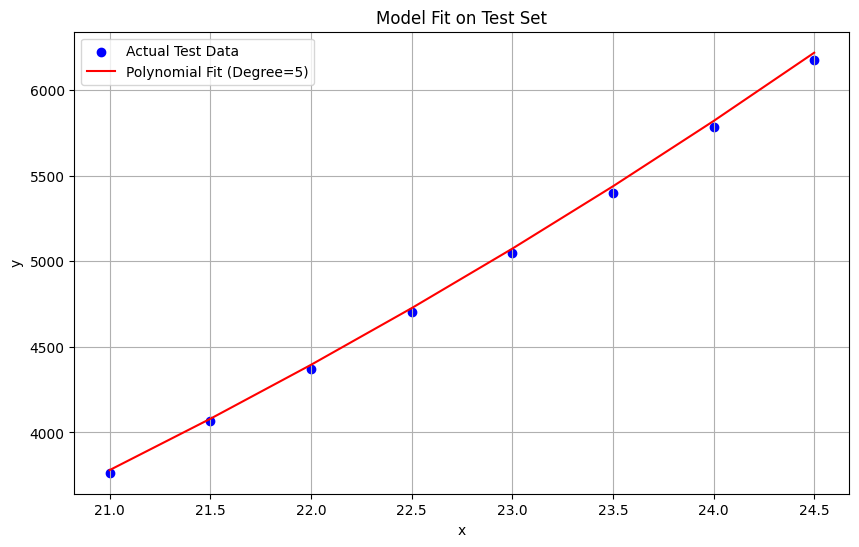

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset directly from the URL
data1 = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/HW11_poly_regression.csv')

# Split the dataset
train_data = data1.iloc[:64]  # First 64 observations for training
validation_data = data1.iloc[64:72]  # Next 8 observations for validation
test_data = data1.iloc[72:]  # Last 8 observations for testing

# Separate features and target variable for train and test sets
X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y'].values
X_test = test_data['x'].values.reshape(-1, 1)
y_test = test_data['y'].values

# Use the optimal degree found earlier (adjust if needed after running Q2)
optimal_degree = 5  # Replace with the degree found from Q2

# Create polynomial features using the optimal degree
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the final model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict over the test set
y_test_pred = model.predict(X_test_poly)

# Compute test R2 score
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R2 score: {test_r2}")

# Visualize the fit of the model over the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, y_test_pred, color='red', label=f'Polynomial Fit (Degree={optimal_degree})')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Fit on Test Set")
plt.legend()
plt.grid(True)
plt.show()
